## Candidate Selection Process - Machine Learning Project
## David Bello

One of the steps in the application for endorsement is the pre-interview assessment . Here, the candidate and spouse go through a series of surveys These are followed by an in-person interview 

This project examines the current pre-interview assessment process by looking at data from the last three years. It applies statistical analysis and ML methods, particularly of classification, to the existing pre-interview data to evaluate the effectiveness of the current process, highlight the most significant features in the dataset, and develop an algorithm that learns from the input provided to classify new observations.
 
The goal of this project is to develop a classification model that can be used to measure the efficacy of the pre-interview surveys in determining who should be endorsed.  

In [1]:
import pandas as pd
import numpy as np

Import the dataset

In [2]:
data = pd.read_excel(r"/Users/dbello/Desktop/DTSC_691_Capstone_Project/AP_PlanterAverages.xlsx") #-- work
#data = pd.read_excel(r"/Users/davidbello/Desktop/DTSC691_Capstone_Project/Project_Files/AP_PlanterAverages.xlsx") # home

In [3]:
data = data.drop(columns=['Idp_Id'])
data

,PlantertIDP,CompletionDate,BirthDate,State,Approved,MaritalStatus,CandidateDISC,CouplePrepare_EnrichType,Candidate_and_Observer_OverallAverage,Candidate_Overall,...,CANDIDATE_360_DERAILER_UNADDRESSED_MARITAL_ISSUES,CANDIDATE_360_DERAILER_UNRESOLVED_EMOTIONAL_ISSUES,CANDIDATE_360_DERAILER_BEING_NON_EVANGELISTIC,CANDIDATE_360_DERAILER_NOT_MAKING_DISCIPLES,CANDIDATE_360_DERAILER_LACK_OF_SPOUSAL_SUPPORT,CANDIDATE_360_CIR_LACK_OF_FUNDING,CANDIDATE_360_CIR_LACK_OF_PARTNERS,CANDIDATE_360_CIR_LACK_OF_FAMILIARITY_WITH_CONTEXT,CANDIDATE_360_CIR_PROXIMITY_TO_EXTENDED_FAMILY,CANDIDATE_360_CIR_LACK_OF_MINISTRY_EXPERIENCE
0,7d209eed-21bb-4d0b-ace9-e321bf04ad29,2020-04-03T00:00:00,1992-01-03T00:00:00,VT,1,Married,CD,Vitalized,88,90,...,0,0,0,0,0,2,0,1,0,2
1,857b5ad9-26f1-494c-92d2-84260cf64439,2019-11-06T00:00:00,1989-08-17T00:00:00,ON,0,Married,DI,Vitalized,84,80,...,0,0,0,0,0,0,1,0,1,3
2,d6a522d0-2ced-400a-9129-155141397c8b,2019-10-16T00:00:00,1982-02-18T00:00:00,ON,1,Married,D,Vitalized,89,85,...,0,0,0,0,0,1,0,0,0,1
3,22d708a3-0f05-439d-b917-6241575e0da2,2019-10-07T00:00:00,1979-09-02T00:00:00,ON,1,Single - Divorced,C,NaN,93,96,...,0,0,0,0,1,2,1,0,0,0
4,044b567b-1e3b-4214-9503-867774b32dd3,2019-11-06T00:00:00,1981-10-22T00:00:00,ON,1,Married,C,Conventional,79,77,...,0,0,0,0,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,3f534a2b-03eb-4f79-b525-20449356fcdc,2021-09-29T00:00:00,1997-07-21T00:00:00,NaN,1,Married,I,Conventional,87,87,...,0,0,0,0,0,3,1,1,2,2
1028,12bb9fdc-a943-4121-917c-6d0a7d9acbe4,2021-09-29T00:00:00,1990-09-28T00:00:00,CA,0,Married,CD,Vitalized,92,96,...,0,1,0,0,0,0,0,0,0,1
1029,b80620b9-556f-4b42-9a12-9ba0083aa1c1,2021-09-29T00:00:00,1992-05-15T00:00:00,NaN,0,Married,S,Conventional,83,82,...,0,2,0,0,0,2,0,1,0,0
1030,f5851ecc-9045-482b-a10f-f91511f221ff,2021-09-29T00:00:00,1969-11-04T00:00:00,FL,1,Married,SC,Vitalized,86,79,...,0,0,0,0,0,0,0,1,0,1


In [4]:
data.columns

Index(['PlantertIDP', 'CompletionDate', 'BirthDate', 'State', 'Approved',
       'MaritalStatus', 'CandidateDISC', 'CouplePrepare_EnrichType',
       'Candidate_and_Observer_OverallAverage', 'Candidate_Overall',
       ...
       'CANDIDATE_360_DERAILER_UNADDRESSED_MARITAL_ISSUES',
       'CANDIDATE_360_DERAILER_UNRESOLVED_EMOTIONAL_ISSUES',
       'CANDIDATE_360_DERAILER_BEING_NON_EVANGELISTIC',
       'CANDIDATE_360_DERAILER_NOT_MAKING_DISCIPLES',
       'CANDIDATE_360_DERAILER_LACK_OF_SPOUSAL_SUPPORT',
       'CANDIDATE_360_CIR_LACK_OF_FUNDING',
       'CANDIDATE_360_CIR_LACK_OF_PARTNERS',
       'CANDIDATE_360_CIR_LACK_OF_FAMILIARITY_WITH_CONTEXT',
       'CANDIDATE_360_CIR_PROXIMITY_TO_EXTENDED_FAMILY',
       'CANDIDATE_360_CIR_LACK_OF_MINISTRY_EXPERIENCE'],
      dtype='object', length=276)

In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import os

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function for saving images
def save_fig(fig_id, tight_layout=False, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
# Inspect data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Columns: 276 entries, PlantertIDP to CANDIDATE_360_CIR_LACK_OF_MINISTRY_EXPERIENCE
dtypes: int64(269), object(7)
memory usage: 2.2+ MB


In [7]:
# Replace NaN's in 'CouplePrepare_EnrichType' and 'MaritalStatus' columns

data['CouplePrepare_EnrichType'] = data['CouplePrepare_EnrichType'].replace([np.nan],'other')
data['MaritalStatus'] = data['MaritalStatus'].replace([np.nan],'Married')

In [8]:
# Filling null values in 'CandidateDISC' with a previous value

data = data.fillna(method="pad")
data

,PlantertIDP,CompletionDate,BirthDate,State,Approved,MaritalStatus,CandidateDISC,CouplePrepare_EnrichType,Candidate_and_Observer_OverallAverage,Candidate_Overall,...,CANDIDATE_360_DERAILER_UNADDRESSED_MARITAL_ISSUES,CANDIDATE_360_DERAILER_UNRESOLVED_EMOTIONAL_ISSUES,CANDIDATE_360_DERAILER_BEING_NON_EVANGELISTIC,CANDIDATE_360_DERAILER_NOT_MAKING_DISCIPLES,CANDIDATE_360_DERAILER_LACK_OF_SPOUSAL_SUPPORT,CANDIDATE_360_CIR_LACK_OF_FUNDING,CANDIDATE_360_CIR_LACK_OF_PARTNERS,CANDIDATE_360_CIR_LACK_OF_FAMILIARITY_WITH_CONTEXT,CANDIDATE_360_CIR_PROXIMITY_TO_EXTENDED_FAMILY,CANDIDATE_360_CIR_LACK_OF_MINISTRY_EXPERIENCE
0,7d209eed-21bb-4d0b-ace9-e321bf04ad29,2020-04-03T00:00:00,1992-01-03T00:00:00,VT,1,Married,CD,Vitalized,88,90,...,0,0,0,0,0,2,0,1,0,2
1,857b5ad9-26f1-494c-92d2-84260cf64439,2019-11-06T00:00:00,1989-08-17T00:00:00,ON,0,Married,DI,Vitalized,84,80,...,0,0,0,0,0,0,1,0,1,3
2,d6a522d0-2ced-400a-9129-155141397c8b,2019-10-16T00:00:00,1982-02-18T00:00:00,ON,1,Married,D,Vitalized,89,85,...,0,0,0,0,0,1,0,0,0,1
3,22d708a3-0f05-439d-b917-6241575e0da2,2019-10-07T00:00:00,1979-09-02T00:00:00,ON,1,Single - Divorced,C,other,93,96,...,0,0,0,0,1,2,1,0,0,0
4,044b567b-1e3b-4214-9503-867774b32dd3,2019-11-06T00:00:00,1981-10-22T00:00:00,ON,1,Married,C,Conventional,79,77,...,0,0,0,0,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,3f534a2b-03eb-4f79-b525-20449356fcdc,2021-09-29T00:00:00,1997-07-21T00:00:00,WA,1,Married,I,Conventional,87,87,...,0,0,0,0,0,3,1,1,2,2
1028,12bb9fdc-a943-4121-917c-6d0a7d9acbe4,2021-09-29T00:00:00,1990-09-28T00:00:00,CA,0,Married,CD,Vitalized,92,96,...,0,1,0,0,0,0,0,0,0,1
1029,b80620b9-556f-4b42-9a12-9ba0083aa1c1,2021-09-29T00:00:00,1992-05-15T00:00:00,CA,0,Married,S,Conventional,83,82,...,0,2,0,0,0,2,0,1,0,0
1030,f5851ecc-9045-482b-a10f-f91511f221ff,2021-09-29T00:00:00,1969-11-04T00:00:00,FL,1,Married,SC,Vitalized,86,79,...,0,0,0,0,0,0,0,1,0,1


In [9]:
data["Approved"]

0       1
1       0
2       1
3       1
4       1
       ..
1027    1
1028    0
1029    0
1030    1
1031    1
Name: Approved, Length: 1032, dtype: int64

In [10]:
# Let's find out if we still have missing values

data.isnull().sum().sum()

0

## Data Standardization & Encoding

In [11]:
## One-hot encode the categorical variables 'MaritalStatus','CandidateDISC', 'CouplePrepare_EnrichType'

from sklearn.preprocessing import OneHotEncoder

# Instantiate object of class OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)
# Create a one-hot-coded matrix of all the categorical columns
data_ohe = one_hot_encoder.fit_transform(data[['MaritalStatus','CandidateDISC', 'CouplePrepare_EnrichType']])
#data_ohe.shape
data_ohe

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [12]:
ohe_column_names = one_hot_encoder.get_feature_names_out()
ohe_column_names

array(['MaritalStatus_Engaged', 'MaritalStatus_Married',
       'MaritalStatus_Single - Divorced',
       'MaritalStatus_Single - Never Married',
       'MaritalStatus_Single - Widowed', 'CandidateDISC_C',
       'CandidateDISC_CD', 'CandidateDISC_D', 'CandidateDISC_DI',
       'CandidateDISC_DS', 'CandidateDISC_I', 'CandidateDISC_IS',
       'CandidateDISC_S', 'CandidateDISC_SC',
       'CouplePrepare_EnrichType_Conflicted',
       'CouplePrepare_EnrichType_Conventional',
       'CouplePrepare_EnrichType_Devitalized',
       'CouplePrepare_EnrichType_Harmonious',
       'CouplePrepare_EnrichType_Vitalized',
       'CouplePrepare_EnrichType_other'], dtype=object)

In [13]:
month_df = one_hot_encoder.categories_[:]
month_df

[array(['Engaged', 'Married', 'Single - Divorced',
        'Single - Never Married', 'Single - Widowed'], dtype=object),
 array(['C', 'CD', 'D', 'DI', 'DS', 'I', 'IS', 'S', 'SC'], dtype=object),
 array(['Conflicted', 'Conventional', 'Devitalized', 'Harmonious',
        'Vitalized', 'other'], dtype=object)]

We need to perform the standardization of the data because the original variables have different scales. We need to bring them to a similar range to get reasonable covariance analysis.

In [14]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(data.iloc[:, 8:]) # select only columns that need standardization
#df_std.shape
df_std

array([[ 0.19590134,  0.66749536, -0.54707272, ...,  1.58256039,
        -0.41845148,  1.85100439],
       [-0.64823302, -0.74207126, -0.31625545, ..., -0.42877252,
         1.4509941 ,  3.03381338],
       [ 0.40693493, -0.03728795,  0.83783091, ..., -0.42877252,
        -0.41845148,  0.66819539],
       ...,
       [-0.85926661, -0.46015794, -1.00870726, ...,  1.58256039,
        -0.41845148, -0.5146136 ],
       [-0.22616584, -0.88302793,  1.06864818, ...,  1.58256039,
        -0.41845148,  0.66819539],
       [ 0.40693493,  0.66749536, -0.08543818, ...,  1.58256039,
        -0.41845148,  0.66819539]])

In [15]:
# Get an array of all the standardized column names
std_column_names = np.array(list(data.iloc[:, 8:].columns))
std_column_names.shape

(268,)

In [16]:
# Combine one-hot-encoded with standardized column names
column_names = np.concatenate((ohe_column_names, std_column_names))
#column_names.shape
column_names = list(column_names)
#column_names

We join the standardized columns with the one-hot-encoded ones. This is our features data

In [17]:
data_ready = np.hstack((data_ohe, df_std))
data_ready.shape

(1032, 288)

In [18]:
# Create a dataframe, 'data_ready', that includes all the standardized and encoded features

data_ready = pd.DataFrame(data_ready)
data_ready.columns =[column_names]
data_ready

,MaritalStatus_Engaged,MaritalStatus_Married,MaritalStatus_Single - Divorced,MaritalStatus_Single - Never Married,MaritalStatus_Single - Widowed,CandidateDISC_C,CandidateDISC_CD,CandidateDISC_D,CandidateDISC_DI,CandidateDISC_DS,...,CANDIDATE_360_DERAILER_UNADDRESSED_MARITAL_ISSUES,CANDIDATE_360_DERAILER_UNRESOLVED_EMOTIONAL_ISSUES,CANDIDATE_360_DERAILER_BEING_NON_EVANGELISTIC,CANDIDATE_360_DERAILER_NOT_MAKING_DISCIPLES,CANDIDATE_360_DERAILER_LACK_OF_SPOUSAL_SUPPORT,CANDIDATE_360_CIR_LACK_OF_FUNDING,CANDIDATE_360_CIR_LACK_OF_PARTNERS,CANDIDATE_360_CIR_LACK_OF_FAMILIARITY_WITH_CONTEXT,CANDIDATE_360_CIR_PROXIMITY_TO_EXTENDED_FAMILY,CANDIDATE_360_CIR_LACK_OF_MINISTRY_EXPERIENCE
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.375016,-0.271941,-0.310151,-0.031144,0.257971,-0.816733,1.582560,-0.418451,1.851004
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.375016,-0.271941,-0.310151,-0.031144,-1.181088,0.273653,-0.428773,1.450994,3.033813
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.375016,-0.271941,-0.310151,-0.031144,-0.461559,-0.816733,-0.428773,-0.418451,0.668195
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.375016,-0.271941,-0.310151,32.109189,0.257971,0.273653,-0.428773,-0.418451,-0.514614
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.375016,-0.271941,-0.310151,-0.031144,0.257971,0.273653,-0.428773,-0.418451,0.668195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.375016,-0.271941,-0.310151,-0.031144,0.977500,0.273653,1.582560,3.320440,1.851004
1028,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.589536,-0.271941,-0.310151,-0.031144,-1.181088,-0.816733,-0.428773,-0.418451,0.668195
1029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.554089,-0.271941,-0.310151,-0.031144,0.257971,-0.816733,1.582560,-0.418451,-0.514614
1030,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.375016,-0.271941,-0.310151,-0.031144,-1.181088,-0.816733,1.582560,-0.418451,0.668195


In [19]:
# Add target variable column to newly created 'data_ready' dataframe (added as last column)

target_var = list(data['Approved'])
data_ready['Approved'] = target_var
data_ready

,MaritalStatus_Engaged,MaritalStatus_Married,MaritalStatus_Single - Divorced,MaritalStatus_Single - Never Married,MaritalStatus_Single - Widowed,CandidateDISC_C,CandidateDISC_CD,CandidateDISC_D,CandidateDISC_DI,CandidateDISC_DS,...,CANDIDATE_360_DERAILER_UNRESOLVED_EMOTIONAL_ISSUES,CANDIDATE_360_DERAILER_BEING_NON_EVANGELISTIC,CANDIDATE_360_DERAILER_NOT_MAKING_DISCIPLES,CANDIDATE_360_DERAILER_LACK_OF_SPOUSAL_SUPPORT,CANDIDATE_360_CIR_LACK_OF_FUNDING,CANDIDATE_360_CIR_LACK_OF_PARTNERS,CANDIDATE_360_CIR_LACK_OF_FAMILIARITY_WITH_CONTEXT,CANDIDATE_360_CIR_PROXIMITY_TO_EXTENDED_FAMILY,CANDIDATE_360_CIR_LACK_OF_MINISTRY_EXPERIENCE,Approved
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,0.257971,-0.816733,1.582560,-0.418451,1.851004,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,-1.181088,0.273653,-0.428773,1.450994,3.033813,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,-0.461559,-0.816733,-0.428773,-0.418451,0.668195,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,32.109189,0.257971,0.273653,-0.428773,-0.418451,-0.514614,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,0.257971,0.273653,-0.428773,-0.418451,0.668195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,0.977500,0.273653,1.582560,3.320440,1.851004,1
1028,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.589536,-0.271941,-0.310151,-0.031144,-1.181088,-0.816733,-0.428773,-0.418451,0.668195,0
1029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.554089,-0.271941,-0.310151,-0.031144,0.257971,-0.816733,1.582560,-0.418451,-0.514614,0
1030,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,-1.181088,-0.816733,1.582560,-0.418451,0.668195,1


## Dataset 1 (statistical analysis)

We will build our first data set on the most significant features based on statistical analysis.

### Random Forest Feature Importance

Let's use a Random Forest Regressor to find the most significant features in the dataset.

In [20]:
# Let's load the packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn.inspection import permutation_importance

In [21]:
# Split dataset for training and testing.

X = data_ready.drop(['Approved'], axis=1)
y = data_ready['Approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


### Find optimal features for Random Forest Regressor

In [22]:
# Import the GridSearchCV class from the sklearn.model_selection library.
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'max_depth': [7,8,9], 
              'n_estimators': [150,200], 
              'min_samples_split': [9,10,11]}

RF_clf_grid_search_cv = GridSearchCV(RandomForestRegressor(random_state = 42), 
                              param_grid=param_grid, verbose=1, cv=10)

RF_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", RF_clf_grid_search_cv.best_params_)

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 10 folds for each of 18 candidates, totalling 180 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

The best parameters are:  {'max_depth': 9, 'min_samples_split': 11, 'n_estimators': 200}


In [24]:
# Fit the Random Forest Regressor with 200 Decision Trees and max_depth=2

rf = RandomForestRegressor(n_estimators=200, max_depth=8, min_samples_split=9, random_state=42)
rf.fit(X_train, y_train)

/var/folders/w3/vqfl42wd3fd53hbr0f08dkmshgfxtc/T/ipykernel_4390/710916755.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, min_samples_split=9, n_estimators=200,
                      random_state=42)

In [25]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:

rf.feature_importances_.shape

(288,)

In [26]:
# Let's create a table with the feature importance values and their corresponding names
# First, we convert each array to a dataframe

df1 = pd.DataFrame(rf.feature_importances_)
df2 = pd.DataFrame(column_names)

#Then, we concatanate the resuting df's and add names to the columns

feat_impt = pd.concat([df2, df1], axis=1)
feat_impt.columns =['Feature_Name', 'Value']
feat_impt = feat_impt.sort_values(["Value"], ascending=False)
feat_impt.head(10)

,Feature_Name,Value
42,Candidate_Character_TruthTeller,0.022515
96,Candidate_Observer_Multiplication_Mobilizer,0.020714
48,Candidate_Observer_Character_Learner,0.015121
93,Candidate_Observer_Multiplication_Discipler,0.013823
44,Candidate_Observer_Character_Adapter,0.013475
79,Candidate_Observer_Leadership_Influencer,0.013422
100,Candidate_Observer_Multiplication_Server,0.012899
91,Candidate_Observer_Multiplication_Builder,0.011342
117,Candidate_Observer_Vision_TrendSetter,0.011314
73,Candidate_Observer_Leadership_Resolver,0.011307


## Dataset 1 (top 8 features)

Dataset 1 consists of the top 8 features according to the Random Forest Regressor above.

In [27]:
# Let's take a look at the top eight features according to the Random Forest Regressor

sorted_df = feat_impt.sort_values(["Value"], ascending=False)
sorted_df.head(8)

,Feature_Name,Value
42,Candidate_Character_TruthTeller,0.022515
96,Candidate_Observer_Multiplication_Mobilizer,0.020714
48,Candidate_Observer_Character_Learner,0.015121
93,Candidate_Observer_Multiplication_Discipler,0.013823
44,Candidate_Observer_Character_Adapter,0.013475
79,Candidate_Observer_Leadership_Influencer,0.013422
100,Candidate_Observer_Multiplication_Server,0.012899
91,Candidate_Observer_Multiplication_Builder,0.011342


In [28]:
# Using the names of the top 8 features ('Feature_Name') as column headings for dataset_1

top_eight = sorted_df.head(8)
dataset_1 = pd.DataFrame(data_ready.loc[:, top_eight['Feature_Name']])

# Add the target variable column to dataset_1

dataset_1 = pd.concat([dataset_1, data_ready['Approved']], axis=1, join='inner')
dataset_1

,Candidate_Character_TruthTeller,Candidate_Observer_Multiplication_Mobilizer,Candidate_Observer_Character_Learner,Candidate_Observer_Multiplication_Discipler,Candidate_Observer_Character_Adapter,Candidate_Observer_Leadership_Influencer,Candidate_Observer_Multiplication_Server,Candidate_Observer_Multiplication_Builder,Approved
0,1.338627,0.346331,0.996616,-1.247874,0.155527,-1.088397,0.060686,-1.053234,1
1,-0.096602,-0.881895,-1.176441,-1.030339,-0.332327,-0.906114,0.060686,-1.189118,0
2,-0.096602,0.755740,0.996616,-0.595270,1.456470,0.552147,0.992647,0.305608,1
3,0.676214,-0.336017,1.213922,-0.377735,0.480763,0.916712,0.433470,0.577376,1
4,-0.869418,-0.881895,-2.045664,-0.595270,-1.795887,-0.723831,-0.684883,-2.683844,1
...,...,...,...,...,...,...,...,...,...
1027,0.676214,-1.291304,0.344699,0.492404,-0.657562,-1.270679,-1.430453,-0.645582,1
1028,1.338627,1.028679,-0.307218,-1.465409,-1.470651,0.552147,0.992647,0.033839,0
1029,-1.531831,0.073392,-0.307218,-1.900479,-1.795887,0.187582,-1.430453,-0.645582,0
1030,0.676214,0.755740,-0.741830,1.145009,0.480763,1.281277,0.992647,1.256797,1


### Correlation
Let's find out which features in Dataset 1 have the strongest correlation 

In [29]:
corr_matrix = dataset_1.corr()

### Positive Correlation

#### From the Correlation Matrix we can see that the following two features have the strongest correlation with the "Approved" target variable:

- 'Candidate_Observer_Multiplication_Mobilizer'

- 'Candidate_Observer_Multiplication_Discipler'

#### Other positive correlations are: 

- 'Candidate_Leadership'

- 'Candidate_Observer_Vision_TrendSetter'

### Histograms
Another way to get a feel of the type of data we're dealing with is through histograms:

Saving figure attribute_histogram_plots


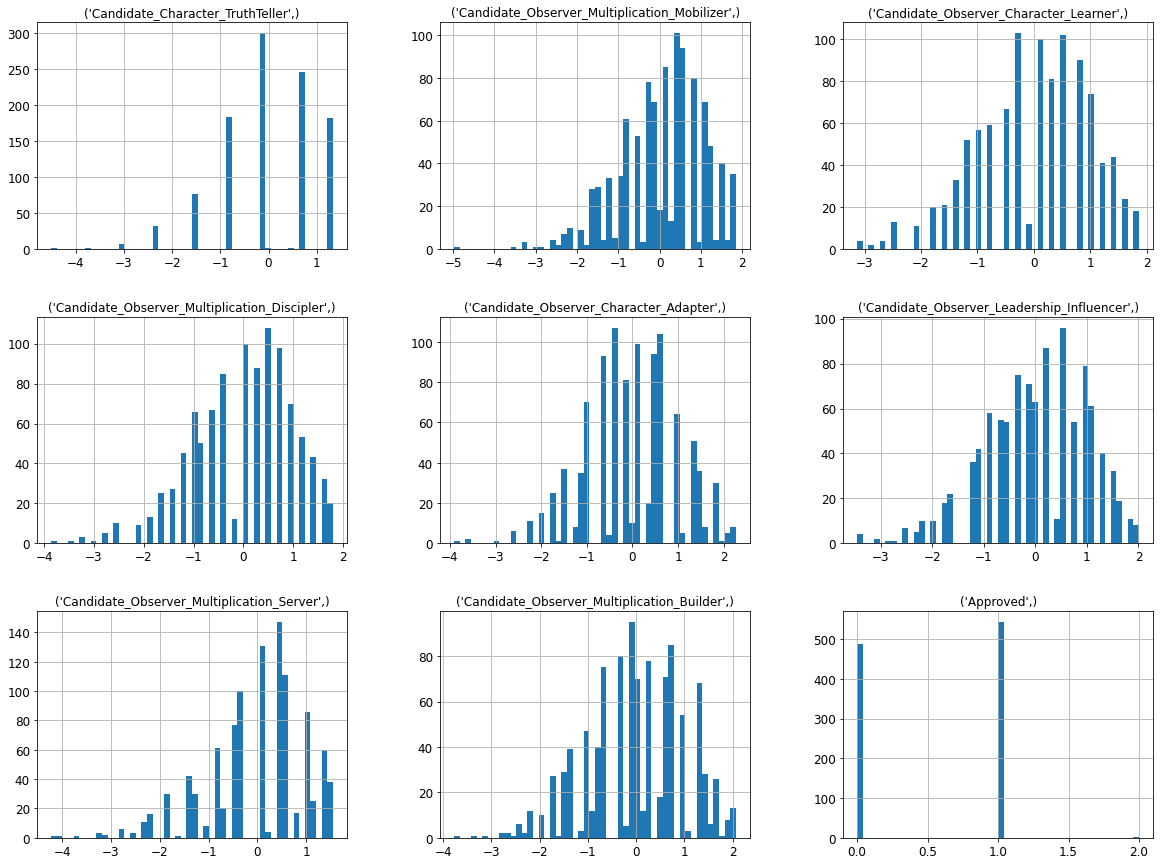

In [30]:
# The hist() method will plot Dataset_1 for us

dataset_1.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show() 

The normal shape of some of the distributions ahead is an indicator of their importance in predicting the target values. This is consistent with the results of the correlation analysis above.

#### According to the correlaton analysis and the Random Forest Regresor feature selection, 'Candidate_Observer_Multiplication_Mobilizer' is the most significant feature in predicting whether someone will be approved as Church Planter.

## Dataset 2 (top 50 features)

Dataset 2 consists of the top 50 features according to the Random Forest Regressor above.

In [31]:
# Let's take a look at the top fifty features according to the Random Forest Regressor

sorted_df = feat_impt.sort_values(["Value"], ascending=False)

In [32]:
# Using the names of the top 50 features ('Feature_Name') as column headings for dataset_2

top_fifty = sorted_df.head(50)
dataset_2 = pd.DataFrame(data_ready.loc[:, top_fifty['Feature_Name']])

# Add the target variable column to dataset_2

dataset_2 = pd.concat([dataset_2, data_ready['Approved']], axis=1, join='inner')
dataset_2

,Candidate_Character_TruthTeller,Candidate_Observer_Multiplication_Mobilizer,Candidate_Observer_Character_Learner,Candidate_Observer_Multiplication_Discipler,Candidate_Observer_Character_Adapter,Candidate_Observer_Leadership_Influencer,Candidate_Observer_Multiplication_Server,Candidate_Observer_Multiplication_Builder,Candidate_Observer_Vision_TrendSetter,Candidate_Observer_Leadership_Resolver,...,CANDIDATE_360_ATTITUDE_WORKAHOLIC,Candidate_Observer_Multiplication_Networker,CouplePrepare_EnrichType_Vitalized,Candidate_Observer_Leadership_Communicator,Candidate_Observer_Leadership_Changer,CANDIDATE_360_CIR_LACK_OF_FUNDING,Candidate_Observer_Character_Steward,Candidate_Observer_Character_Reflector,Candidate_Leadership_Trainer,Approved
0,1.338627,0.346331,0.996616,-1.247874,0.155527,-1.088397,0.060686,-1.053234,-0.609074,-0.426512,...,0.406714,0.014595,1.0,-0.354222,0.295590,0.257971,-0.670751,0.003408,0.711431,1
1,-0.096602,-0.881895,-1.176441,-1.030339,-0.332327,-0.906114,0.060686,-1.189118,-1.512963,-0.244100,...,0.406714,-0.471261,1.0,-0.719049,0.640084,-1.181088,0.169061,2.072285,-0.133444,0
2,-0.096602,0.755740,0.996616,-0.595270,1.456470,0.552147,0.992647,0.305608,0.837149,1.032786,...,-0.694936,0.500450,1.0,0.740260,0.984578,-0.461559,0.798920,0.417184,0.711431,1
3,0.676214,-0.336017,1.213922,-0.377735,0.480763,0.916712,0.433470,0.577376,-1.332186,-0.061688,...,0.406714,0.014595,0.0,0.557846,0.640084,0.257971,0.379014,-0.617255,1.556306,1
4,-0.869418,-0.881895,-2.045664,-0.595270,-1.795887,-0.723831,-0.684883,-2.683844,-1.332186,-1.338574,...,-0.694936,-2.252733,0.0,-1.995945,-0.910138,0.257971,-3.190186,-1.031031,-0.133444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0.676214,-1.291304,0.344699,0.492404,-0.657562,-1.270679,-1.430453,-0.645582,-0.428296,-1.885811,...,-0.694936,-0.633213,0.0,-0.719049,-0.737891,0.977500,-0.880704,-1.237918,0.711431,1
1028,1.338627,1.028679,-0.307218,-1.465409,-1.470651,0.552147,0.992647,0.033839,-0.066741,-0.791337,...,-0.694936,0.824354,1.0,-0.536636,-0.737891,-1.181088,0.798920,-0.617255,1.556306,0
1029,-1.531831,0.073392,-0.307218,-1.900479,-1.795887,0.187582,-1.430453,-0.645582,-1.332186,-1.338574,...,2.610013,-0.309309,0.0,-1.448704,-0.565644,0.257971,-0.880704,-0.203480,0.711431,0
1030,0.676214,0.755740,-0.741830,1.145009,0.480763,1.281277,0.992647,1.256797,0.475593,1.032786,...,-0.694936,0.500450,1.0,1.105087,0.640084,-1.181088,-0.880704,0.417184,-0.133444,1


## Dataset 3 (entire dataset)

Dataset 3 consists of the entire data set.

In [33]:
dataset_3 = data_ready

# Evaluate all three datasets

#### We will evaluate all 3 datasets using classification models. This includes:  Logistic Regression, Decision Tree, Random Forest, SVM, KNN, and Naive Bayes.

## Dataset 1

In [34]:
dataset_1 # has only nine features including the target values column

,Candidate_Character_TruthTeller,Candidate_Observer_Multiplication_Mobilizer,Candidate_Observer_Character_Learner,Candidate_Observer_Multiplication_Discipler,Candidate_Observer_Character_Adapter,Candidate_Observer_Leadership_Influencer,Candidate_Observer_Multiplication_Server,Candidate_Observer_Multiplication_Builder,Approved
0,1.338627,0.346331,0.996616,-1.247874,0.155527,-1.088397,0.060686,-1.053234,1
1,-0.096602,-0.881895,-1.176441,-1.030339,-0.332327,-0.906114,0.060686,-1.189118,0
2,-0.096602,0.755740,0.996616,-0.595270,1.456470,0.552147,0.992647,0.305608,1
3,0.676214,-0.336017,1.213922,-0.377735,0.480763,0.916712,0.433470,0.577376,1
4,-0.869418,-0.881895,-2.045664,-0.595270,-1.795887,-0.723831,-0.684883,-2.683844,1
...,...,...,...,...,...,...,...,...,...
1027,0.676214,-1.291304,0.344699,0.492404,-0.657562,-1.270679,-1.430453,-0.645582,1
1028,1.338627,1.028679,-0.307218,-1.465409,-1.470651,0.552147,0.992647,0.033839,0
1029,-1.531831,0.073392,-0.307218,-1.900479,-1.795887,0.187582,-1.430453,-0.645582,0
1030,0.676214,0.755740,-0.741830,1.145009,0.480763,1.281277,0.992647,1.256797,1


In [35]:
# Split dataset_1 for training and testing

X = dataset_1.iloc[:,:-1]
y = dataset_1['Approved'].to_numpy()
y = np.ravel(y, order = 'C')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 1. Logistic Regression - Dataset 1

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# Train a Logistic Regression model

log_reg_1 = LogisticRegression()
log_reg_1.fit(X_train, y_train)

LogisticRegression()

In [38]:
log_reg_1_score = log_reg_1.score(X_test,y_test)
print("ACCURACY OF THE LOGISTIC REGRESSION MODEL ON DATASET 1: ", log_reg_1_score) 

ACCURACY OF THE LOGISTIC REGRESSION MODEL ON DATASET 1:  0.5232558139534884


Our logistic regression model only achieved 52% accuracy classifing new instances.

### 2. Decision Tree - Dataset 1

In [39]:
from sklearn.tree import DecisionTreeClassifier

#### Perform a grid search to find the optimal parameters for this Decision Tree Classifier

In [40]:
# Create a dictionary called param_grid with three key-value pairs.
param_grid = {'max_depth': [8,9,10], 
              'splitter': ["best", "random"], 
              'min_samples_split': [4,5,6,7]}

# Instantiate an object of the DecisionTreeClassifier class
tree_clf_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 42), 
                              param_grid=param_grid, verbose=1, cv=10)

tree_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", tree_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'max_depth': 9, 'min_samples_split': 4, 'splitter': 'best'}


The best parameters are:  max_depth =9, min_samples_split = 4, splitter = 'best'

In [41]:
# Train a DecisionTreeClassifier model

# instantiate an object of the class DecisionTreeClassifier

tree_clf_1 = DecisionTreeClassifier(max_depth =9, min_samples_split = 4, splitter = 'best', random_state = 42) 
tree_clf_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=4, random_state=42)

In [42]:
tree_clf_1_score = tree_clf_1.score(X_test,y_test)
print("ACCURACY OF THE DECISION TREE CLASSIFIER MODEL ON DATASET 1: ", tree_clf_1_score)

ACCURACY OF THE DECISION TREE CLASSIFIER MODEL ON DATASET 1:  0.5155038759689923


In [43]:
tree_clf_1.feature_importances_

array([0.06546161, 0.14669105, 0.13937012, 0.16557723, 0.13190539,
       0.15108741, 0.05346123, 0.14644596])

In [44]:
X_train.columns

MultiIndex([(            'Candidate_Character_TruthTeller',),
            ('Candidate_Observer_Multiplication_Mobilizer',),
            (       'Candidate_Observer_Character_Learner',),
            ('Candidate_Observer_Multiplication_Discipler',),
            (       'Candidate_Observer_Character_Adapter',),
            (   'Candidate_Observer_Leadership_Influencer',),
            (   'Candidate_Observer_Multiplication_Server',),
            (  'Candidate_Observer_Multiplication_Builder',)],
           )

#### We observe here that the most significant features in dataset_1, according to this Decision Tree Classifier  are:

- 'Candidate_Observer_Multiplication_Mobilizer'
- 'Candidate_Observer_Multiplication_Discipler'
- 'Candidate_Observer_Multiplication_Server'

### 3. Random Forest Classifier - Dataset 1

In [45]:
from sklearn.ensemble import RandomForestClassifier

#### Perform a grid search to find the optimal parameters for this Random Forest Classifier

In [46]:
param_grid = {'max_depth': [3,4,5,6], 
              'n_estimators': [50,100,150], 
              'min_samples_split': [8,9,10]}

RF_clf_grid_search_cv = GridSearchCV(RandomForestClassifier(random_state = 42), 
                              param_grid=param_grid, verbose=1, cv=10)

RF_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", RF_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 50}


The best parameters are:  max_depth = 6, n_estimators = 50, min_samples_split = 10

In [47]:
# creating a RF classifier
rf_clf_1 = RandomForestClassifier(max_depth = 6, n_estimators = 50, min_samples_split = 10, random_state = 42) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf_clf_1.fit(X_train, y_train)
 
# performing predictions on the test dataset
# y_pred = rf_clf.predict(X_test)

RandomForestClassifier(max_depth=6, min_samples_split=10, n_estimators=50,
                       random_state=42)

In [48]:
rf_clf_1_score = rf_clf_1.score(X_test,y_test)
print("ACCURACY OF THE RANDOM FOREST CLASSIFIER MODEL ON DATASET 1: ", rf_clf_1_score)

ACCURACY OF THE RANDOM FOREST CLASSIFIER MODEL ON DATASET 1:  0.5232558139534884


### 4. SVM - Dataset 1

In [49]:
# Import svm model
from sklearn import svm

#### Perform a grid search to find the optimal parameters for this Random Forest Classifier

In [50]:
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVM_clf_grid_search_cv = GridSearchCV(svm.SVC(), 
                              param_grid=param_grid, refit = True, verbose=1, cv=10)

SVM_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", SVM_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


The best parameters are:  C = 1, gamma = 0.1, kernel = 'rbf'

In [51]:
#Create a svm Classifier
svm_clf_1 = svm.SVC(C = 1, gamma = 0.1, kernel = 'rbf') # Linear Kernel

#Train the model using the training sets
svm_clf_1.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [52]:
svm_clf_1_score =  svm_clf_1.score(X_test,y_test)
print("ACCURACY OF THE SUPPORT VECTOR MACHINE MODEL ON DATASET 1: ", svm_clf_1_score)

ACCURACY OF THE SUPPORT VECTOR MACHINE MODEL ON DATASET 1:  0.5116279069767442


### 5. KNN - Dataset 1

In [53]:
# Import knn model
from sklearn.neighbors import KNeighborsClassifier

#### Perform a grid search to find the optimal parameters for this K Nearest Neighbors Classifier

In [54]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

KNN_clf_grid_search_cv = GridSearchCV(KNeighborsClassifier(), 
                              param_grid=param_grid, verbose=1, cv=10)

KNN_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", KNN_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'n_neighbors': 27}


The best parameters are:  n_neighbors = 27

In [55]:
knn_clf_1 = KNeighborsClassifier(n_neighbors=27)
 
knn_clf_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [56]:
knn_clf_1_score = knn_clf_1.score(X_test, y_test)
print("ACCURACY OF THE K NEIGHBORS CLASSIFIER MODEL ON DATASET 1: ", knn_clf_1_score)

ACCURACY OF THE K NEIGHBORS CLASSIFIER MODEL ON DATASET 1:  0.5193798449612403


### 6. Naive Bayes - Dataset 1

In [57]:
# Import Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [58]:
nb_clf_1 = GaussianNB()

nb_clf_1.fit(X_train, y_train)

GaussianNB()

In [59]:
nb_clf_1_score = nb_clf_1.score(X_test, y_test)
print("ACCURACY OF THE NAIVE BAYES MODEL ON DATASET 1: ", nb_clf_1_score)

ACCURACY OF THE NAIVE BAYES MODEL ON DATASET 1:  0.5310077519379846


## Dataset 2

In [60]:
dataset_2

,Candidate_Character_TruthTeller,Candidate_Observer_Multiplication_Mobilizer,Candidate_Observer_Character_Learner,Candidate_Observer_Multiplication_Discipler,Candidate_Observer_Character_Adapter,Candidate_Observer_Leadership_Influencer,Candidate_Observer_Multiplication_Server,Candidate_Observer_Multiplication_Builder,Candidate_Observer_Vision_TrendSetter,Candidate_Observer_Leadership_Resolver,...,CANDIDATE_360_ATTITUDE_WORKAHOLIC,Candidate_Observer_Multiplication_Networker,CouplePrepare_EnrichType_Vitalized,Candidate_Observer_Leadership_Communicator,Candidate_Observer_Leadership_Changer,CANDIDATE_360_CIR_LACK_OF_FUNDING,Candidate_Observer_Character_Steward,Candidate_Observer_Character_Reflector,Candidate_Leadership_Trainer,Approved
0,1.338627,0.346331,0.996616,-1.247874,0.155527,-1.088397,0.060686,-1.053234,-0.609074,-0.426512,...,0.406714,0.014595,1.0,-0.354222,0.295590,0.257971,-0.670751,0.003408,0.711431,1
1,-0.096602,-0.881895,-1.176441,-1.030339,-0.332327,-0.906114,0.060686,-1.189118,-1.512963,-0.244100,...,0.406714,-0.471261,1.0,-0.719049,0.640084,-1.181088,0.169061,2.072285,-0.133444,0
2,-0.096602,0.755740,0.996616,-0.595270,1.456470,0.552147,0.992647,0.305608,0.837149,1.032786,...,-0.694936,0.500450,1.0,0.740260,0.984578,-0.461559,0.798920,0.417184,0.711431,1
3,0.676214,-0.336017,1.213922,-0.377735,0.480763,0.916712,0.433470,0.577376,-1.332186,-0.061688,...,0.406714,0.014595,0.0,0.557846,0.640084,0.257971,0.379014,-0.617255,1.556306,1
4,-0.869418,-0.881895,-2.045664,-0.595270,-1.795887,-0.723831,-0.684883,-2.683844,-1.332186,-1.338574,...,-0.694936,-2.252733,0.0,-1.995945,-0.910138,0.257971,-3.190186,-1.031031,-0.133444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0.676214,-1.291304,0.344699,0.492404,-0.657562,-1.270679,-1.430453,-0.645582,-0.428296,-1.885811,...,-0.694936,-0.633213,0.0,-0.719049,-0.737891,0.977500,-0.880704,-1.237918,0.711431,1
1028,1.338627,1.028679,-0.307218,-1.465409,-1.470651,0.552147,0.992647,0.033839,-0.066741,-0.791337,...,-0.694936,0.824354,1.0,-0.536636,-0.737891,-1.181088,0.798920,-0.617255,1.556306,0
1029,-1.531831,0.073392,-0.307218,-1.900479,-1.795887,0.187582,-1.430453,-0.645582,-1.332186,-1.338574,...,2.610013,-0.309309,0.0,-1.448704,-0.565644,0.257971,-0.880704,-0.203480,0.711431,0
1030,0.676214,0.755740,-0.741830,1.145009,0.480763,1.281277,0.992647,1.256797,0.475593,1.032786,...,-0.694936,0.500450,1.0,1.105087,0.640084,-1.181088,-0.880704,0.417184,-0.133444,1


In [61]:
# Split dataset_2 for training and testing

X = dataset_2.iloc[:,:-1]
y = dataset_2['Approved']
y = np.ravel(y, order = 'C')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 1. Logistic Regression - Dataset 2

In [62]:
# Train a Logistic Regression model

log_reg_2 = LogisticRegression()
log_reg_2.fit(X_train, y_train)

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
log_reg_2_score = log_reg_2.score(X_test,y_test)
print("ACCURACY OF THE LOGISTIC REGRESSION MODEL ON DATASET 2: ", log_reg_2_score) 

ACCURACY OF THE LOGISTIC REGRESSION MODEL ON DATASET 2:  0.5271317829457365


### 2. Decision Tree - Dataset 2

#### Perform a grid search to find the optimal parameters for this Decision Tree Classifier

In [64]:
# Create a dictionary called param_grid with three key-value pairs.
param_grid = {'max_depth': [6,7,8], 
              'splitter': ["best", "random"], 
              'min_samples_split': [7,8,9]}

# Instantiate an object of the DecisionTreeClassifier class
tree_clf_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 42), 
                              param_grid=param_grid, verbose=1, cv=10)

tree_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", tree_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'max_depth': 7, 'min_samples_split': 9, 'splitter': 'random'}


The best parameters are:  max_depth = 7, min_samples_split = 9, splitter = 'random'

In [65]:
# instantiate an object of the class DecissionTreeClassifier
tree_clf_2 = DecisionTreeClassifier(max_depth = 7, min_samples_split = 9, splitter = 'random', random_state = 42) 
tree_clf_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=42,
                       splitter='random')

In [66]:
tree_clf_2_score = tree_clf_2.score(X_test,y_test)
print("ACCURACY OF THE DECISION TREE MODEL ON DATASET 2: ", tree_clf_2_score) 

ACCURACY OF THE DECISION TREE MODEL ON DATASET 2:  0.5426356589147286


In [67]:
tree_clf_2.feature_importances_

array([0.07905622, 0.0726178 , 0.0401838 , 0.03893188, 0.        ,
       0.01101173, 0.04817716, 0.03214417, 0.        , 0.03446023,
       0.        , 0.04174969, 0.        , 0.        , 0.05548621,
       0.03342412, 0.0299451 , 0.02290833, 0.03987845, 0.01249796,
       0.        , 0.01885047, 0.        , 0.        , 0.01587103,
       0.01188934, 0.02773954, 0.01493026, 0.        , 0.06745268,
       0.        , 0.02704799, 0.        , 0.02318659, 0.02085162,
       0.        , 0.        , 0.        , 0.03118807, 0.02156593,
       0.        , 0.02064349, 0.        , 0.0364392 , 0.03167677,
       0.        , 0.01302942, 0.        , 0.01332554, 0.01183923])

#### We observe here that the second feature in dataset_2 is the most significant: 'Candidate_Observer_Multiplication_Discipler'

### 3. Random Forest Classifier - Dataset 2

#### Perform a grid search to find the optimal parameters for this Random Forest Classifier

In [68]:
param_grid = {'max_depth': [7,8,9], 
              'n_estimators': [150,200], 
              'min_samples_split': [9,10,11]}

RF_clf_grid_search_cv = GridSearchCV(RandomForestClassifier(random_state = 42), 
                              param_grid=param_grid, verbose=1, cv=10)

RF_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", RF_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'max_depth': 7, 'min_samples_split': 11, 'n_estimators': 150}


The best parameters are:  max_depth = 7, n_estimators = 150, min_samples_split = 11

In [69]:
# Creating a RF classifier
rf_clf_2 = RandomForestClassifier(max_depth = 9, n_estimators = 200, min_samples_split = 9, random_state = 42) 
 
# Training the model on the training dataset
rf_clf_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_split=9, n_estimators=200,
                       random_state=42)

In [70]:
rf_clf_2_score = rf_clf_2.score(X_test,y_test)
print("ACCURACY OF THE RANDOM FOREST MODEL ON DATASET 2: ", rf_clf_2_score) 

ACCURACY OF THE RANDOM FOREST MODEL ON DATASET 2:  0.5581395348837209


### 4. SVM - Dataset 2

#### Perform a grid search to find the optimal parameters for this Random Forest Classifier

In [71]:
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVM_clf_grid_search_cv = GridSearchCV(svm.SVC(), 
                              param_grid=param_grid, refit = True, verbose=1, cv=10)

SVM_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", SVM_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


The best parameters are:  C = 1, gamma = 0.01, kernel = 'rbf'

In [72]:
# Create a svm Classifier
svm_clf_2 = svm.SVC(C = 1, gamma = 0.01, kernel = 'rbf')

# Train the model using the training sets
svm_clf_2.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [73]:
svm_clf_2_score = svm_clf_2.score(X_test,y_test)
print("ACCURACY OF THE SUPPORT VECTOR MACHINE MODEL ON DATASET 2: ", svm_clf_2_score) 

ACCURACY OF THE SUPPORT VECTOR MACHINE MODEL ON DATASET 2:  0.5348837209302325


### 5. KNN - Dataset 2

#### Perform a grid search to find the optimal parameters for this k Nearest Neighbors Classifier

In [74]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

KNN_clf_grid_search_cv = GridSearchCV(KNeighborsClassifier(), 
                              param_grid=param_grid, verbose=1, cv=10)

KNN_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", KNN_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'n_neighbors': 13}


The best parameters are:  n_neighbors = 13

In [75]:
# Create a knn classifier
knn_clf_2 = KNeighborsClassifier(n_neighbors=13)
 
# Train the model using the training sets
knn_clf_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [76]:
knn_clf_2_score = knn_clf_2.score(X_test,y_test)
print("ACCURACY OF THE K NEIGHBORS CLASSIFIER MODEL ON DATASET 2: ", knn_clf_2_score) 

ACCURACY OF THE K NEIGHBORS CLASSIFIER MODEL ON DATASET 2:  0.5232558139534884


### 6. Naive Bayes - Dataset 2

In [77]:
# Create a Naive-Bayes classifier
nb_clf_2 = GaussianNB()

# Train the model using the training sets
nb_clf_2.fit(X_train, y_train)

GaussianNB()

In [78]:
nb_clf_2_score = nb_clf_2.score(X_test,y_test)
print("ACCURACY OF THE NAIVE BAYES CLASSIFIER MODEL ON DATASET 2: ", nb_clf_2_score) 

ACCURACY OF THE NAIVE BAYES CLASSIFIER MODEL ON DATASET 2:  0.5465116279069767


## Dataset 3

In [79]:
dataset_3

,MaritalStatus_Engaged,MaritalStatus_Married,MaritalStatus_Single - Divorced,MaritalStatus_Single - Never Married,MaritalStatus_Single - Widowed,CandidateDISC_C,CandidateDISC_CD,CandidateDISC_D,CandidateDISC_DI,CandidateDISC_DS,...,CANDIDATE_360_DERAILER_UNRESOLVED_EMOTIONAL_ISSUES,CANDIDATE_360_DERAILER_BEING_NON_EVANGELISTIC,CANDIDATE_360_DERAILER_NOT_MAKING_DISCIPLES,CANDIDATE_360_DERAILER_LACK_OF_SPOUSAL_SUPPORT,CANDIDATE_360_CIR_LACK_OF_FUNDING,CANDIDATE_360_CIR_LACK_OF_PARTNERS,CANDIDATE_360_CIR_LACK_OF_FAMILIARITY_WITH_CONTEXT,CANDIDATE_360_CIR_PROXIMITY_TO_EXTENDED_FAMILY,CANDIDATE_360_CIR_LACK_OF_MINISTRY_EXPERIENCE,Approved
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,0.257971,-0.816733,1.582560,-0.418451,1.851004,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,-1.181088,0.273653,-0.428773,1.450994,3.033813,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,-0.461559,-0.816733,-0.428773,-0.418451,0.668195,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,32.109189,0.257971,0.273653,-0.428773,-0.418451,-0.514614,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,0.257971,0.273653,-0.428773,-0.418451,0.668195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,0.977500,0.273653,1.582560,3.320440,1.851004,1
1028,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.589536,-0.271941,-0.310151,-0.031144,-1.181088,-0.816733,-0.428773,-0.418451,0.668195,0
1029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.554089,-0.271941,-0.310151,-0.031144,0.257971,-0.816733,1.582560,-0.418451,-0.514614,0
1030,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.375016,-0.271941,-0.310151,-0.031144,-1.181088,-0.816733,1.582560,-0.418451,0.668195,1


In [80]:
# Split dataset_2 for training and testing

X = dataset_3.iloc[:,:-1]
y = dataset_3['Approved']
y = np.ravel(y, order = 'C')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 1. Logistic Regression - Dataset 3

In [81]:
# Train a Logistic Regression model

log_reg_3 = LogisticRegression()
log_reg_3.fit(X_train, y_train)

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
log_reg_3_score = log_reg_3.score(X_test,y_test)
print("ACCURACY OF THE LOGISTIC REGRESSION MODEL ON DATASET 3: ", log_reg_3_score) 

ACCURACY OF THE LOGISTIC REGRESSION MODEL ON DATASET 3:  0.47674418604651164


### 2. Decision Tree - Dataset 3

#### Perform a grid search to find the optimal parameters for this Decision Tree Classifier

In [83]:
# Create a dictionary called param_grid with three key-value pairs.
param_grid = {'max_depth': [7,8,9], 
              'splitter': ["best", "random"], 
              'min_samples_split': [8,9,10]}

# Instantiate an object of the DecisionTreeClassifier class
tree_clf_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state = 42), 
                              param_grid=param_grid, verbose=1, cv=10)

tree_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", tree_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'max_depth': 9, 'min_samples_split': 8, 'splitter': 'random'}


The best parameters are:  max_depth = 9, min_samples_split = 8, splitter = 'random'

In [84]:
# instantiate an object of the class DecisionTreeClassifier
tree_clf_3 = DecisionTreeClassifier(max_depth = 9, min_samples_split = 8, splitter = 'random', random_state = 42) 
tree_clf_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=8, random_state=42,
                       splitter='random')

In [85]:
tree_clf_3_score = tree_clf_3.score(X_test,y_test)
print("ACCURACY OF THE DECISION TREE MODEL ON DATASET 3: ", tree_clf_3_score) 

ACCURACY OF THE DECISION TREE MODEL ON DATASET 3:  0.5348837209302325


### 3. Random Forest Classifier - Dataset 3

#### Perform a grid search to find the optimal parameters for this Random Forest Classifier

In [86]:
param_grid = {'max_depth': [4,5,6], 
              'n_estimators': [40,50,60], 
              'min_samples_split': [1,2,3]}

RF_clf_grid_search_cv = GridSearchCV(RandomForestClassifier(random_state = 42), 
                              param_grid=param_grid, verbose=1, cv=10)

RF_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", RF_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 40}


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):


The best parameters are:  max_depth = 4, n_estimators = 40, min_samples_split = 3

In [87]:
# creating a RF classifier
rf_clf_3 = RandomForestClassifier(max_depth = 4, n_estimators = 40, min_samples_split = 3, random_state = 42) 
 
# Training the model on the training dataset
rf_clf_3.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=40,
                       random_state=42)

In [88]:
rf_clf_3_score = rf_clf_3.score(X_test,y_test)
print("ACCURACY OF THE RANDOM FOREST CLASSIFIER MODEL ON DATASET 3: ", rf_clf_3_score) 

ACCURACY OF THE RANDOM FOREST CLASSIFIER MODEL ON DATASET 3:  0.5271317829457365


### 4. SVM - Dataset 3

#### Perform a grid search to find the optimal parameters for this Support Vector Machine Classifier

In [89]:
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVM_clf_grid_search_cv = GridSearchCV(svm.SVC(), 
                              param_grid=param_grid, refit = True, verbose=1, cv=10)

SVM_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", SVM_clf_grid_search_cv.best_params_)

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 25 candidates, totalling 250 fits
The best parameters are:  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


The best parameters are:  C = 10, gamma = 0.0001, kernel = 'rbf'

In [90]:
#Create a svm Classifier
svm_clf_3 = svm.SVC(C = 10, gamma = 0.0001, kernel = 'rbf') # Linear Kernel

#Train the model using the training sets
svm_clf_3.fit(X_train, y_train)

SVC(C=10, gamma=0.0001)

In [91]:
svm_clf_3_score = svm_clf_3.score(X_test,y_test)
print("ACCURACY OF THE RANDOM SUPPORT VECTOR MACHINE MODEL ON DATASET 3: ", svm_clf_3_score) 

ACCURACY OF THE RANDOM SUPPORT VECTOR MACHINE MODEL ON DATASET 3:  0.5348837209302325


### 5. KNN - Dataset 3

#### Perform a grid search to find the optimal parameters for this k Nearest Neighbors Classifier

In [92]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

KNN_clf_grid_search_cv = GridSearchCV(KNeighborsClassifier(), 
                              param_grid=param_grid, verbose=1, cv=10)

KNN_clf_grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", KNN_clf_grid_search_cv.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


The best parameters are:  {'n_neighbors': 27}


The best parameters are:  n_neighbors = 27

In [93]:
knn_clf_3 = KNeighborsClassifier(n_neighbors=27)
 
#Train the model using the training sets
knn_clf_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [94]:
knn_clf_3_score = knn_clf_3.score(X_test,y_test)
print("ACCURACY OF THE K NEIGHBORS CLASSIFIER MODEL ON DATASET 3: ", knn_clf_3_score) 

ACCURACY OF THE K NEIGHBORS CLASSIFIER MODEL ON DATASET 3:  0.5


### 6. Naive Bayes - Dataset 3

In [95]:
nb_clf_3 = GaussianNB()

nb_clf_3.fit(X_train, y_train)

GaussianNB()

In [96]:
nb_clf_3_score = nb_clf_3.score(X_test,y_test)
print("ACCURACY OF THE NAIVE BAYES MODEL ON DATASET 3: ", nb_clf_3_score) 

ACCURACY OF THE NAIVE BAYES MODEL ON DATASET 3:  0.46511627906976744


## Comparison of all the Models for the Three Datasets 

In [97]:
# Let's buid a small dataset of the results of all the models to create a line plot

# initialize data of lists.
data = {'Model': ['LR','CART', 'RF', 'SVM', 'KNN', 'NB'],
        'Dataset 1': [log_reg_1_score, 
                      tree_clf_1_score, 
                      rf_clf_1_score, 
                      svm_clf_1_score, 
                      knn_clf_1_score, 
                      nb_clf_1_score],  
        'Dataset 2': [log_reg_2_score, 
                      tree_clf_2_score, 
                      rf_clf_2_score, 
                      svm_clf_2_score, 
                      knn_clf_2_score, 
                      nb_clf_2_score],
        'Dataset 3':  [log_reg_3_score, 
                      tree_clf_3_score, 
                      rf_clf_3_score, 
                      svm_clf_3_score, 
                      knn_clf_3_score, 
                      nb_clf_3_score]}

# Creates pandas DataFrame.
df = pd.DataFrame(data)

# Add a column for the averages of each model
df['avg/score'] = df.mean(numeric_only=True, axis=1)

df.loc['mean'] = df.mean()

# print the data
df

/var/folders/w3/vqfl42wd3fd53hbr0f08dkmshgfxtc/T/ipykernel_4390/2470103203.py:30: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc['mean'] = df.mean()


,Model,Dataset 1,Dataset 2,Dataset 3,avg/score
0,LR,0.523256,0.527132,0.476744,0.509044
1,CART,0.515504,0.542636,0.534884,0.531008
2,RF,0.523256,0.558140,0.527132,0.536176
3,SVM,0.511628,0.534884,0.534884,0.527132
4,KNN,0.519380,0.523256,0.500000,0.514212
5,NB,0.531008,0.546512,0.465116,0.514212
mean,NaN,0.520672,0.538760,0.506460,0.521964


In [98]:
#!pip install seaborn

In [99]:
#!pip install --upgrade pip

In [100]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(0, 0.5, 'Accuracy Score')

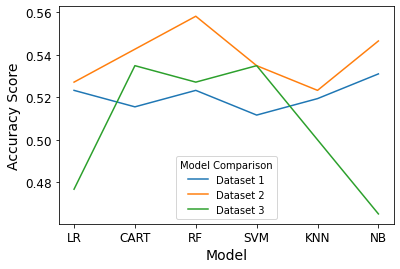

In [101]:
# Draw line plots

fig, ax = plt.subplots()
ax= sns.lineplot(x='Model', y='Dataset 1', data=df)
ax1 = sns.lineplot(x='Model', y='Dataset 2', data=df)
ax2 = sns.lineplot(x='Model', y='Dataset 3', data=df)
plt.legend(labels=['Dataset 1','Dataset 2', 'Dataset 3'], title = "Model Comparison")
ax.set_xlabel("Model", fontsize = 14)
ax.set_ylabel("Accuracy Score", fontsize = 14)

Based on the mean of the accuracy scores of all the models, Dataset 2 is producing the best results.

## Dataset 2

In [102]:
# Split dataset_2 for training and testing

X = dataset_2.iloc[:,:-1]
y = dataset_2['Approved']
y = np.ravel(y, order = 'C')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Comparison for Dataset 2 After Hyperparameter Tuning, cv=10

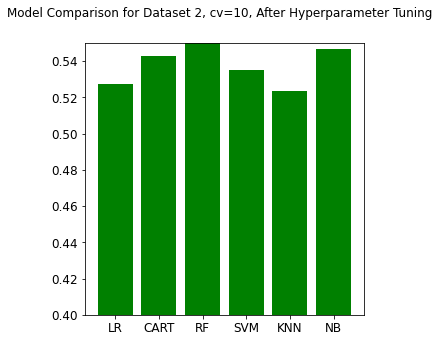

In [103]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Model Comparison for Dataset 2, cv=10, After Hyperparameter Tuning')
ax = fig.add_subplot(111)
ax.set_ylim(0.4, 0.55)
plt.bar(df['Model'][0:6,], df['Dataset 2'][0:6,], color = 'green')
#ax.set_xticklabels(names)
plt.show()

## Model Comparison for Dataset 2 After Hyperparameter Tuning, cv=5

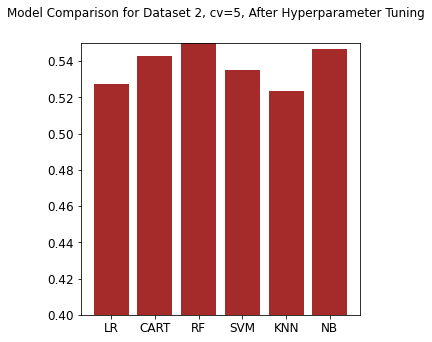

In [104]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Model Comparison for Dataset 2, cv=5, After Hyperparameter Tuning')
ax = fig.add_subplot(111)
ax.set_ylim(0.4, 0.55)
plt.bar(df['Model'][0:6,], df['Dataset 2'][0:6,], color = 'brown')
#ax.set_xticklabels(names)
plt.show()

## Compute Generalization Errors for Dataset 2

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
y_pred = log_reg_2.predict(X_test)
print('Logistic Regression Generalization Error: {:.4f}'.format(mean_squared_error(y_test,y_pred)))

Logistic Regression Generalization Error: 0.4729


In [107]:
y_pred = tree_clf_2.predict(X_test)
print('Decision Tree Classifier Generalization Error: {:.4f}'.format(mean_squared_error(y_test,y_pred)))

Decision Tree Classifier Generalization Error: 0.4574


In [108]:
y_pred = rf_clf_2.predict(X_test)
print('Random Forest Classifier Generalization Error: {:.4f}'.format(mean_squared_error(y_test,y_pred)))

Random Forest Classifier Generalization Error: 0.4419


In [109]:
y_pred = svm_clf_2.predict(X_test)
print('SVM Classifier Generalization Error: {:.4f}'.format(mean_squared_error(y_test,y_pred)))

SVM Classifier Generalization Error: 0.4651


In [110]:
y_pred = knn_clf_2.predict(X_test)
print('KNN Classifier Generalization Error: {:.4f}'.format(mean_squared_error(y_test,y_pred)))

KNN Classifier Generalization Error: 0.4767


In [111]:
y_pred = nb_clf_2.predict(X_test)
print('Naive-Bayes Classifier Generalization Error: {:.4f}'.format(mean_squared_error(y_test,y_pred)))

Naive-Bayes Classifier Generalization Error: 0.4535


#### The generalization error of the Random Forest Classifier model was the lowest of the six, meaning that this model's line of fit is the one that yields the lowest average squared distances to the data points.

## Non-Nested Cross Validation for Decision Tree Classifier - Dataset 2
Here we perform non-nested cross validation on the model with the lowest MSE

In [112]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [113]:
cv_results1 = cross_val_score(rf_clf_2, X_train, y_train, cv=5, scoring="accuracy")
cv_results1

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.47096774, 0.50967742, 0.56129032, 0.63225806, 0.5974026 ])

In [114]:
cv_results1.mean()

0.5543192291579389

In [115]:
cv_results1 = cross_val_score(rf_clf_2, X_train, y_train, cv=10, scoring="accuracy")
cv_results1

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


array([0.53846154, 0.48717949, 0.55128205, 0.47435897, 0.61038961,
       0.44155844, 0.66233766, 0.53246753, 0.62337662, 0.67532468])

In [116]:
cv_results1.mean()

0.5596736596736597

## Nested Cross Validation for Decision Tree Classifier - Dataset 2
Here we perform nested cross validation on the model with the lowest MSE

In [117]:
params = {'max_depth': [7,8,9], 
              'splitter': ["best", "random"], 
              'min_samples_split': [8,9,10]}

In [118]:
# 4-outer (error estimation w/ optimal hyperparameters), 5-inner (hyperparameter tuning) nested CV
clf = GridSearchCV(estimator=tree_clf_2, param_grid=params, cv=5) # inner
# cross_val_score takes care of splitting the data into folds. No need to use train_test_split
nested_scores = cross_val_score(estimator=clf, X=X, y=y, cv=4, scoring='accuracy') # outer 
nested_scores

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.51550388, 0.49612403, 0.53488372, 0.53488372])

In [119]:
cv_results1 = cross_val_score(rf_clf_2, X_train, y_train, cv=10, scoring="accuracy")
cv_results1.mean()

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.5596736596736597

In [120]:
nested_scores

array([0.51550388, 0.49612403, 0.53488372, 0.53488372])

In [121]:
nested_scores.mean()

0.5203488372093024

## Confusion Matrix

In [122]:
y_predict = rf_clf_2.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[53, 71],
       [46, 88]])

## Precision and Recall

In [124]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred) # this is the robability that the classifier is correct

0.5534591194968553

In [125]:
recall_score(y_test, y_pred) # 

0.6567164179104478

# ML Model Deployment
#### Next, we will create a fourth data set of the three most significant features and the target variable and will train a Random Forest Classifier on it. This is the classifier that will be used in the user interface demonstration

In [126]:
data

{'Model': ['LR', 'CART', 'RF', 'SVM', 'KNN', 'NB'],
 'Dataset 1': [0.5232558139534884,
  0.5155038759689923,
  0.5232558139534884,
  0.5116279069767442,
  0.5193798449612403,
  0.5310077519379846],
 'Dataset 2': [0.5271317829457365,
  0.5426356589147286,
  0.5581395348837209,
  0.5348837209302325,
  0.5232558139534884,
  0.5465116279069767],
 'Dataset 3': [0.47674418604651164,
  0.5348837209302325,
  0.5271317829457365,
  0.5348837209302325,
  0.5,
  0.46511627906976744]}

In [127]:
dataset_4 = data_ready[["Candidate_Observer_Multiplication_Mobilizer",
                  "Candidate_Observer_Multiplication_Discipler",
                  "Candidate_Observer_Multiplication_Server",
                  "Approved"]]

In [128]:
dataset_4

,Candidate_Observer_Multiplication_Mobilizer,Candidate_Observer_Multiplication_Discipler,Candidate_Observer_Multiplication_Server,Approved
0,0.346331,-1.247874,0.060686,1
1,-0.881895,-1.030339,0.060686,0
2,0.755740,-0.595270,0.992647,1
3,-0.336017,-0.377735,0.433470,1
4,-0.881895,-0.595270,-0.684883,1
...,...,...,...,...
1027,-1.291304,0.492404,-1.430453,1
1028,1.028679,-1.465409,0.992647,0
1029,0.073392,-1.900479,-1.430453,0
1030,0.755740,1.145009,0.992647,1


In [129]:
# Fill NaN values with mean

dataset_4 = dataset_4.fillna(dataset_4.mean())

In [130]:
dataset_4.isnull().sum().sum()

0

In [131]:
# Split dataset_4 for training and testing

X = dataset_4.iloc[:,:-1]
y = dataset_4['Approved']
y = np.ravel(y, order = 'C')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [153]:
y

array([1, 0, 1, ..., 0, 1, 1])

## Cross Validation for Dataset 4
Here we perform cross validation on all six models using Dataset 4

In [133]:
from sklearn.svm import SVC

Here we have created and empty array and then appended it with all the models.

In [134]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

Here we have created two empty arrays named 'results' and 'names' and an object 'scoring.' Now we have made a for loop which will itterate over all the models. In the loop we have used the function Kfold and cross validation score with the desired parameters. Finally we have used a print statement to print the result for all the models.

In [135]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
         kfold = model_selection.KFold(n_splits=10, shuffle=True)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, verbose=0)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

LR: 0.549367 (0.069221)
CART: 0.524742 (0.068499)
RF: 0.536180 (0.030704)
SVM: 0.557026 (0.051703)
KNN: 0.525791 (0.046783)
NB: 0.533516 (0.039126)


We have also ploted a bar chart to clearly visualize the results.

In [136]:
names

['LR', 'CART', 'RF', 'SVM', 'KNN', 'NB']

In [137]:
avg_results = [np.mean(k) for k in results]
avg_results

[0.5493672993672993,
 0.5247419247419247,
 0.5361804861804861,
 0.5570263070263068,
 0.5257908757908758,
 0.5335164835164835]

/var/folders/w3/vqfl42wd3fd53hbr0f08dkmshgfxtc/T/ipykernel_4390/3449265139.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


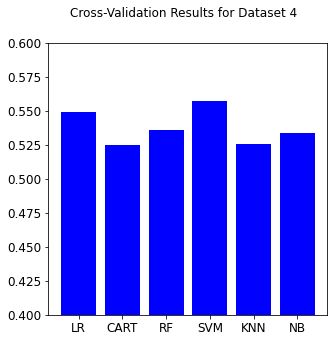

In [138]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Cross-Validation Results for Dataset 4')
ax = fig.add_subplot(111)
ax.set_ylim(0.4, 0.6)
plt.bar(names, avg_results, color = 'blue')
ax.set_xticklabels(names)
plt.show()

## Nested Cross-Validation for Dataset 4

In [139]:
from sklearn.model_selection import cross_val_score

In [140]:
lr_p_grid = {'C': np.logspace(-5, 8, 15)}
cart_p_grid = {'max_depth': [7,8,9], 
              'splitter': ["best", "random"], 
              'min_samples_split': [8,9,10]}
rf_p_grid = {'max_depth': [4,5,6], 
              'n_estimators': [40,50,60], 
              'min_samples_split': [1,2,3]}
svm_p_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
knn_p_grid = {'n_neighbors': list(range(1, 31))}
nb_p_grid = {}

In [141]:
models = []
models.append(('LR', LogisticRegression(), lr_p_grid))
models.append(('CART', DecisionTreeClassifier(), cart_p_grid))
models.append(('RF', RandomForestClassifier(), rf_p_grid))
models.append(('SVM', SVC(), svm_p_grid))
models.append(('KNN', KNeighborsClassifier(), knn_p_grid))
models.append(('NB', GaussianNB(), nb_p_grid))

In [142]:
scores = []
model_names = []
scoring = 'accuracy'
for name, model, params in models:
    # 4-outer (error estimation w/ optimal hyperparameters), 5-inner (hyperparameter tuning) nested CV
    clf = GridSearchCV(estimator=model, param_grid=params, cv=5) # inner
    # cross_val_score takes care of splitting the data into folds. No need to use train_test_split
    nested_scores = cross_val_score(estimator=clf, X=X, y=y, cv=4, scoring='accuracy') # outer 
    scores.append(nested_scores)
    model_names.append(name)
    msg = "%s: %f (%f)" % (name, nested_scores.mean(), nested_scores.std())
    print(msg)
    nested_scores = []

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


LR: 0.537791 (0.006920)


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CART: 0.532946 (0.041157)


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dbello/opt/anaconda3/lib/python3.9/si

/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):


RF: 0.546512 (0.023735)


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVM: 0.557171 (0.021646)


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN: 0.533915 (0.035669)
NB: 0.531008 (0.013144)


/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/dbello/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [143]:
model_names

['LR', 'CART', 'RF', 'SVM', 'KNN', 'NB']

In [144]:
scores

[array([0.53875969, 0.53875969, 0.52713178, 0.54651163]),
 array([0.56589147, 0.49612403, 0.58139535, 0.48837209]),
 array([0.57751938, 0.51162791, 0.54263566, 0.55426357]),
 array([0.57364341, 0.52713178, 0.58139535, 0.54651163]),
 array([0.58527132, 0.53488372, 0.53100775, 0.48449612]),
 array([0.53875969, 0.54651163, 0.52713178, 0.51162791])]

In [145]:
# Average all the accuracy scores
avg_scores = [np.mean(k) for k in scores]
avg_scores

[0.5377906976744186,
 0.5329457364341086,
 0.5465116279069768,
 0.557170542635659,
 0.5339147286821706,
 0.5310077519379846]

In [146]:
from statistics import mean
mean(avg_scores)

0.539890180878553

/var/folders/w3/vqfl42wd3fd53hbr0f08dkmshgfxtc/T/ipykernel_4390/378160673.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_names)


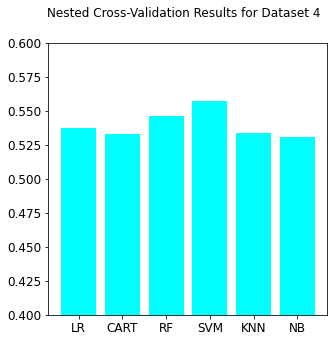

In [147]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Nested Cross-Validation Results for Dataset 4')
ax = fig.add_subplot(111)
ax.set_ylim(0.4, 0.6)
plt.bar(model_names, avg_scores, color = 'cyan')
ax.set_xticklabels(model_names)
plt.show()

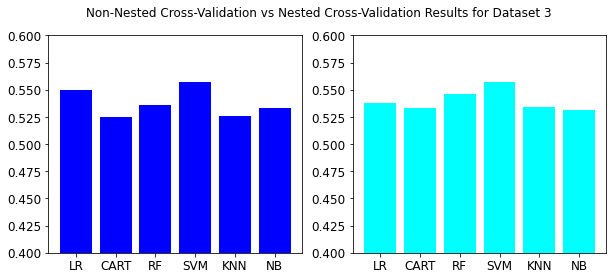

In [148]:
fig = plt.figure(figsize=(10,4))

# Cross-Validation Results for Dataset 3
ax = fig.suptitle('Cross-Validation Results for Dataset 4')
ax = fig.add_subplot(1,2,1)
ax.set_ylim(0.4, 0.6)
plt.bar(names, avg_results, color = 'blue')
#plt.show()

# Nested Cross-Validation Results for Dataset 3
#fig = plt.figure(figsize=(10,4))
ax1 = fig.suptitle('Non-Nested Cross-Validation vs Nested Cross-Validation Results for Dataset 3')
ax1 = fig.add_subplot(1,2,2)
ax1.set_ylim(0.4, 0.6)
plt.bar(model_names, avg_scores, color = 'cyan')
plt.show()

In [149]:
SVM_classifier = SVC()
SVM_classifier.fit(X,y)

SVC()

## Save Model Using Pickle

In [150]:
# import pickle

# # Saving model to disk
# pickle.dump(SVM_classifier, open('model.pkl','wb'))

# # Loading model to compare the results
# model = pickle.load(open('model.pkl','rb'))

# #print(model.predict([[82, 89, 96]])) 

In [151]:
#!pip install flask

In [152]:
# print(model.predict([[80, 100, 100]])) 